## Calculateクラス
### LoadData(): データを読みこむメソッド
- @param pop: 人口メッシュデータ（中心緯度経度、人口データを持つgeojson形式のデータ）
- @param com: 商業集積地区データ（中心緯度経度、売り場面積、売上高を持つgeojson形式のデータ）
            
### Dist(): ヒュべニの公式を用いた二点の距離を求めるメソッド
- @param p1: 緯度経度をリストで持つ地点
- @param p2: 緯度経度をリストで持つ地点

### oneAttract(): 顧客が店舗に行く確率を求めるメソッド
- @apram distList: すべての店舗までの距離のリスト
- @param areaList: すべての店舗の売場面積のリスト
- @param area: 面積補正係数
- @param dist: 距離補正係数
- @return 店舗の魅力度のリスト

### CleanList(): リストの-9999を0に変換するメソッド
- @param ln: 変換するリスト
- @return 変換後のリスト

### PredictSale(): 売上高を求めるメソッド
- @param pop_ptList 人口メッシュの緯度経度リスト
- @param pop_popList 人口メッシュの人口リスト
- @param com_ptList 商業施設の緯度経度リスト
- @param com_areaList 商業施設の売り場面積リスト
- @param area,dist 面積補正係数,距離補正係数
- @return predictSale 売上の予測値

## ライブラリ

In [1]:
import numpy as np
import json
import tqdm
from huffcalculate import Calculate
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


## Calculateクラスのコンストラクタ

In [2]:
calculate = Calculate('100_pop.geojson', 'A_com.geojson', 0.489773)
(pop, com) = calculate.LoadData()

## GeoJSON形式を読み込む

In [3]:
#100mメッシュの点を取得
pop_ptList = [i['geometry']['coordinates'] for i in pop['features']]
#商業施設座標の取得
com_ptList = [i['geometry']['coordinates'] for i in com['features']]
#売場面積の取得
com_areaList = [i['properties']['売場面積'] for i in com['features']]
#100mメッシュの人口を取得, -9999を0に変換
pop_popList = [i['properties']['H27総人口'] for i in pop['features']]
pop_popList = calculate.CleanList(pop_popList)

#売り上げを取得
com_saleList = np.array([i['properties']['年間商品販売額(百万円)'] for i in com['features']])
#出力用に取得
#meshcodeの取得
pop_meshcodeList = [i['properties']['MESHCODE'] for i in pop['features']]
#keycodeの取得
pop_keycodeList = [i['properties']['KEYCODE'] for i in pop['features']]

#idを作成
id = [i for i in range(len(com_areaList))]

## 比例定数の算出
- 売上高/人口 = k(円/人)

In [4]:
popSum = np.sum(pop_popList)
saleSum = np.sum(com_saleList)
k = 2956541 / popSum*0.37
k

0.485898751112213

## 係数の定義
- @param area: 面積のべき数
- @param dist: 距離のべき数
- @param k: 係数

In [360]:
area = 1.32
dist = 1.40

## 売上高の予測

In [361]:
predictList = calculate.PredictSale(pop_ptList, pop_popList, com_ptList, com_areaList, area, dist)


 16%|█▋        | 5360/32564 [00:14<01:14, 364.72it/s]


 34%|███▍      | 11019/32564 [00:29<00:55, 391.57it/s]


 51%|█████     | 16604/32564 [00:43<00:41, 388.66it/s]


 68%|██████▊   | 22234/32564 [00:58<00:26, 393.74it/s]


 86%|████████▌ | 27892/32564 [01:12<00:13, 358.59it/s]


100%|██████████| 32564/32564 [01:24<00:00, 385.63it/s]

In [362]:
predictList*k

array([  8437.8290464 ,   1485.89974232,    760.20726564,    989.38333125,
         1899.3832938 ,  41046.07587068,   1693.62211562,    855.3374498 ,
        23236.91162427,  11873.14313398,    536.80776434,   1024.85304968,
          391.72018742,    668.69432124,  40204.31882509,    592.7266166 ,
          905.26426747,    594.25723292,    916.99464121,    800.67393685,
         9787.77166514,  12348.31603917,    743.14776146,    454.73098519,
        42557.81345507,   8017.01746083,   5963.27738722,   1624.02007364,
         7250.98117085,  62106.2368344 ,    348.76190491,   1326.23646033,
        15593.78531414,    804.17564107,   1387.71840335,  38172.06406654,
          546.58363622,   1098.81424174,    988.80223786, 229201.51144292,
          577.17796473,    766.44432206,   1873.69541934,    973.96466679,
          388.24536925,   4439.24664198,   1429.88440744,   2504.10476599,
          594.66425202,    395.82952998,    750.05992056,    518.69414984,
         6540.88701954,  

(array([129.,   4.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.290000e+02, 2.713470e+04, 5.414040e+04, 8.114610e+04,
        1.081518e+05, 1.351575e+05, 1.621632e+05, 1.891689e+05,
        2.161746e+05, 2.431803e+05, 2.701860e+05]),
 <a list of 10 Patch objects>)

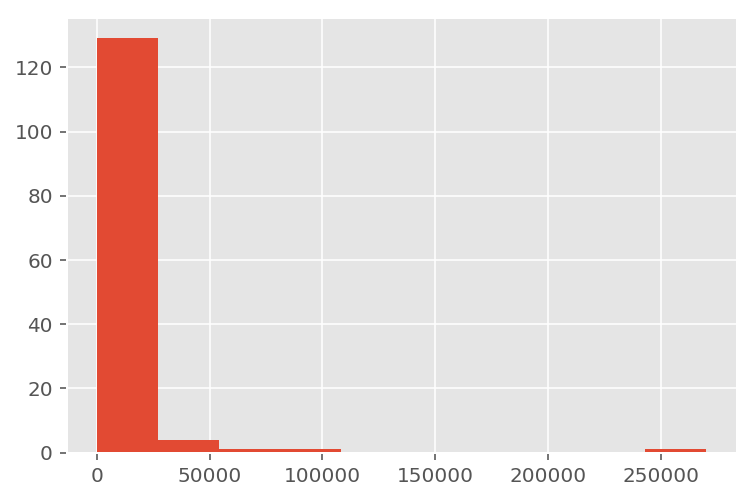

In [363]:
plt.hist(com_saleList)

In [364]:
com_saleList

array([  5312,   1457,    889,   3868,   2638,  31499,    960,    968,
        12089,  10006,    577,   1830,    835,   1955,  24340,   2755,
         2426,    825,   1593,    938,   5707,   6520,   1009,    835,
        38308,   5748,   4248,   3436,   6647,  54551,   2899,   4188,
        28689,   7132,   2391,  83263,   2452,   4985,   2227, 270186,
         2952,   2487,   6955,   4694,    643,   8936,   3335,   6998,
          596,   1280,   1290,    560,   5522,   1393,   1615,   2601,
         3698,   2693,   2175,   3974,  15710,   2086,  11617,  23437,
         3262,   6822,  33778,    907,   1387,   1418,   1070,   3381,
        10632,   1227,   4909,   1091,   1600,    347,    479,   2054,
         1137,   2365,   6921,   1424,   4894,  23254,   1605,    202,
         1200,    938,  12814,   4930,  11504,    673,   1499,    693,
          610,    641,   1217,   1313,   9915,  16053,   2955,   2360,
         2230,   3207,   2597,   6438,  10052,   2109,    523,    840,
      

## 残差の計算

In [365]:
e = com_saleList - k*predictList
pd.DataFrame(e)

,0
0,-3125.829046
1,-28.899742
2,128.792734
3,2878.616669
4,738.616706
5,-9547.075871
6,-733.622116
7,112.662550
8,-11147.911624
9,-1867.143134


## 平均二乗誤差

In [366]:
RMSE = np.sqrt(np.sum(e**2)/len(com_saleList))
RMSE

7061.097326467255

## 残差プロット

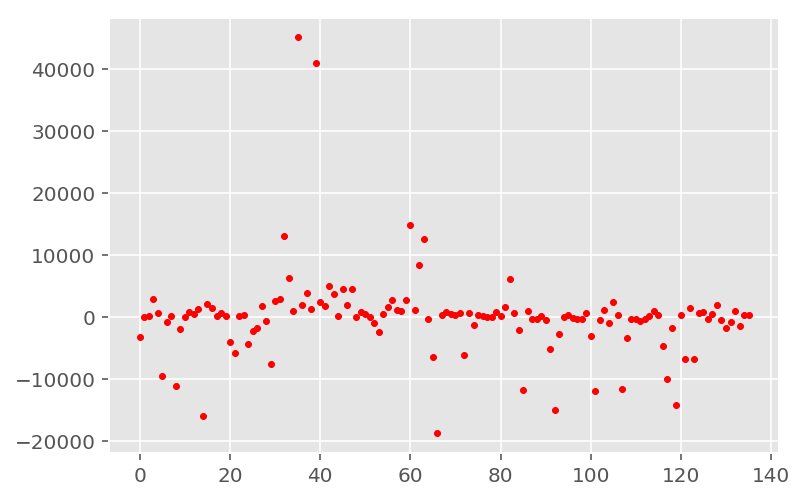

In [367]:
plt.scatter(id, e, c='red', marker='.')

## 理論値売上に対する誤差

In [368]:
sum(e/com_saleList)/136

-0.0012058895458475977

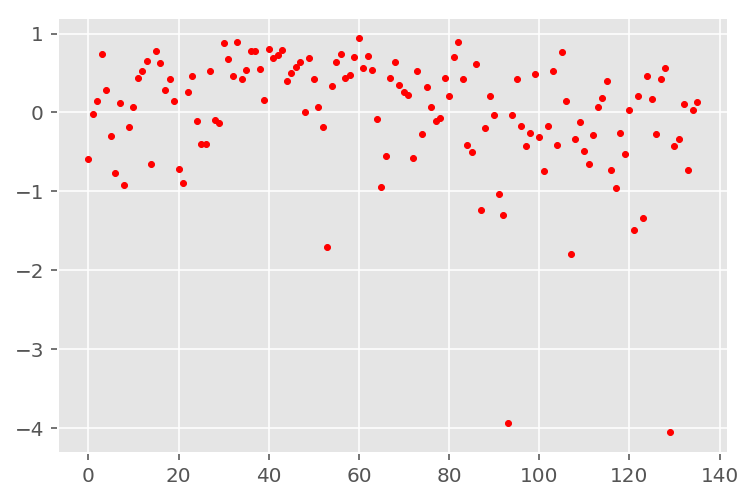

In [369]:
plt.scatter(id, e/com_saleList, c='red', marker='.')

In [370]:
pd.DataFrame({0 : id, 1: e/com_saleList})

,0,1
0,0,-0.588447
1,1,-0.019835
2,2,0.144874
3,3,0.744213
4,4,0.279991
5,5,-0.303091
6,6,-0.764190
7,7,0.116387
8,8,-0.922153
9,9,-0.186602


In [371]:
x = predictList*k

In [372]:
y = com_saleList

In [373]:
np.corrcoef(x,y)

array([[1.       , 0.9618544],
       [0.9618544, 1.       ]])